#感知器

前面，我们介绍了广义线性模型，用联接方程描述解释变量、超参数和响应变量的线性关系。这一章，我们将介绍另一种线性模型，称为感知器（perceptron）。感知器是一种研究单个训练样本的二元分类器，训练较大的数据集很有用。而且，感知器和它的不足激发了我们后面两种将介绍的模型。

<!-- TEASER_END-->

感知器是Frank Rosenblatt在1957年就职于Cornell航空实验室(Cornell Aeronautical Laboratory)时发明的，其灵感源自于对人脑的仿真。大脑是由处理信息的神经元（neurons）细胞和连接神经元细胞进行信息传递的突触（synapses）构成。据说人脑有1千亿神经元和10万亿突触构成。神经元的组成如下图所示，主要包括树突（Dendrites），细胞核（Cell Body）和轴突（Axon）。树突从一个神经元接受电信号。信号在细胞核里处理，然后通过轴突将处理过的信号传递给另一个神经元。

![neurons](mlslpic/8.1 neurons.png)

一个神经元可以看作是将一个或多个输入处理成一个输出的计算单元。一个感知器函数类似于一个神经元；它接受一个或多个输入，处理他们然后返回一个输出。咋看这样的模型，就像人脑千亿神经元的一个孤胆英雄，无用武之地。但是，有两个理由使得我们有必要介绍它。首先，神经元可以实时(online)，错误驱动(error-driven)的学习，神经元可以通过一一个的训练样本不断更新参数，而非一次性使用整套数据。实时学习可能有效的处理内存无法容纳的大数据。其次，理解感知器的工作原理是后两章算法学习的基础，包括支持向量机（support vector machines）和人工神经网络（artificial neural networks）。感知器通常用下面的图形表示：

![perceptrons](mlslpic/8.2 perceptrons.png)

$x_1$，$x_2$和$x_3$是输入单元。每个输入单元分别代表一个特征。感知器通常用另外一个输入单元代表一个常用误差项，但是这个输入单元在图形中通常被忽略了。中间的圆圈是一个计算单元，类似神经元的细胞核。连接输入单元和计算单元的边类似于树突。每条边是一个权重，或者是一个参数。参数容易解释，如果某个解释变量与阳性类型（positive class）相关，其权重为正，某个解释变量与阴性类型（negative class）相关，其权重为负。连接计算单元和输出单元的边类似轴突。

##激活函数

感知器通过使用激活函数（activation function ）处理解释变量和模型参数的线性组合对样本分类，计算公式如下所示。解释变量和模型参数的线性组合有时也称为感知器的预激活（preactivation）。

$$y=\phi(\sum_{i=1}^n{w_ix_i}+b)$$

其中，$w_i$是模型参数，$b$是常误差项，$\phi()$是激活方程。常用的激活方程有几种。Rosenblatt最初的感知器用的是阶跃函数（Heaviside step function或unit step function）作为激活函数。函数公式如下所示：

$$
g(x)=
\begin{Bmatrix}
1, x>0 \\
0, x \le 0 \\
\end{Bmatrix}
$$

如果加权解释变量的和加上常误差项之和大于0，则激活方程返回1，此时感知器就把样本归类为阳性。否则，激活方程返回0，感知器就把样本归类为阴性。阶跃函数图形如下所示：

![step](mlslpic/8.3 step.png)

另一个常用的激活函数是逻辑S形（logistic sigmoid ）激活函数。这个激活函数的梯度分布可以更有效的计算，在处理后面的ANN算法时十分有效。其计算公式如下：

$$g(x)= \frac 1 {1+e^{-x}}$$

其中，$x$是加权输入的和。这个模型与第四章的逻辑方程类似，是解释变量值与模型参数的线性组合，与逻辑回归模型是一样的。虽然用逻辑S形激活函数的感知器与逻辑回归是一样的，但是要估计的参数不同。

###感知器学习算法

感知器学习算法首先需要将权重设置为0或很小的随机数，然后预测训练样本的类型。感知器是一种错误驱动（error-driven）的学习算法。如果感知器是正确的，算法就继续处理下一个样本。如果感知器是错误的，算法就更新权重，重新预测。权重的更新规则如下：

$$w_i(t+1) = w_i(t) + \alpha (d_j-y_j(t))x_{j,i},0 \le i \le n$$

对每个训练样本来说，每个解释变量的参数值增加$\alpha (d_j-y_j(t))x_{j,i}$，$d_j$是样本$j$的真实类型，$y_j(t)$是样本$j$的预测类型，$x_{j,i}$是第$i$个样本$j$的解释变量的值，$\alpha$是控制学习速率的超参数。如果预测是正确的，$d_j-y_j(t)$等于0，$\alpha (d_j-y_j(t))x_{j,i}$也是0，此时，权重不更新。如预测是错误的，权重会按照学习速率，$d_j-y_j(t)$与解释变量值的乘积增加。

这里的更新规则与梯度下降法中的权重更新规则类似，都是朝着使样本得到正确分类更新，且更新的幅度是由学习速率控制的。每遍历一次训练样本称为完成了一世代（epoch）。如果学习完一世代后，所有的样本都分类正确，那么算法就会聚合（converge）。学习算法不能保证聚合；后面的章节，我们会介绍线性不可分数据集，是不可能聚合的。因此，学习算法还需要一个超参数，在算法终止前需要更新的最大世代数。

##感知器二元分类

下面我们来解决一个分类案例。假设你想从一堆猫里分辨幼猫（kitten）和成年猫（adult cats）。数据集只有两个解释变量：用来睡觉的天数比例，闹脾气的天数比例。训练数据由下面四个样本构成：

|样本|用来睡觉的天数比例|闹脾气的天数比例|幼猫还是成年猫？|
|:-:|:-:|:-:|:-:|
|1|0.2|0.1|幼猫|
|2|0.4|0.6|幼猫|
|3|0.5|0.2|幼猫|
|4|0.7|0.9|成年猫|

下面的散点图表面这些样本是可以线性分离的：

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

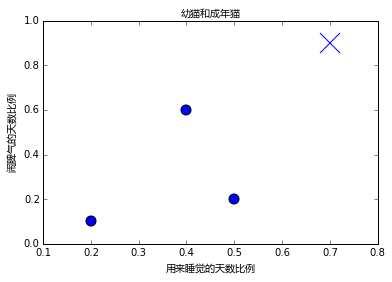

In [3]:
import numpy as np

X = np.array([
    [0.2, 0.1],
    [0.4, 0.6],
    [0.5, 0.2],
    [0.7, 0.9]
])

y = [0, 0, 0, 1]

markers = ['.', 'x']
plt.scatter(X[:3, 0], X[:3, 1], marker='.', s=400)
plt.scatter(X[3, 0], X[3, 1], marker='x', s=400)
plt.xlabel('用来睡觉的天数比例',fontproperties=font)
plt.ylabel('闹脾气的天数比例',fontproperties=font)
plt.title('幼猫和成年猫',fontproperties=font)
plt.show()

我们的目标是训练一个感知器可以用两个解释变量分辨猫的类型。我们用阳性表示幼猫，用阴性表示成年猫。用感知网络图（preceding network diagram）可以呈现感知器训练的过程。

我们的感知器有三个输入单元。$x_1$是常误差项，$x_2$和$x_3$是两个特征的输入项。我们的感知器的计算单元用一个阶跃函数表示。本例中，我们把最大的训练世代数设置为10；如果算法经过10世代没有聚合，就会停止返回当时的权重值。为了简化，我们把训练速率设置为1。首先，我们把所有的权重设置为0。第一代的训练结果如下表所示：

|世代1| | | | | | |
|:-:|:-:|:-:|:-:|:-:|
|样本|初始权重|$x_i$|激活函数值|预测值，目标值|是否正确|升级权重|
| 0 |0, 0, 0|1.0, 0.2, 0.1|1.0 \* 0 + 0.2 \* 0 + 0.1 \* 0 = 0.0| 0, 1 | False | 1.0, 0.2, 0.1 |
| 1 |1.0, 0.2, 0.1|1.0, 0.4, 0.6|1.0 \* 1.0 + 0.4 \* 0.2 + 0.6 \* 0.1 = 1.14| 1, 1 | True | 1.0, 0.2, 0.1 |
| 2 | 1.0, 0.2, 0.1|1.0, 0.5, 0.2|1.0 \* 1.0 + 0.5 \* 0.2 + 0.2 \* 0.1 = 1.12| 1, 1 | True | 1.0, 0.2, 0.1 |
| 3 | 1.0, 0.2, 0.1|1.0, 0.7, 0.9|1.0 \* 1.0 + 0.7 \* 0.2 + 0.9 \* 0.1 = 1.23| 1, 0 | False | 0, -0.5, -0.8 |

开始所有权重为0。第一个变量的解释变量加权之和为0，则激活函数值为0，因此样本的预测结果为阴性，即幼猫样本是成年猫类型。预测错误，所以我们要根据规则升级权重。我们将每个输入单元的权重增加，增加幅度为学习速率，真实类型与预测类型的差异值与对应解释变量的值的乘积。

然后用更新的权重预测第二个样本类型。这次解释变量加权之和为1.14，激活函数值为1，真实类型为1，所以类型判断正确。于是继续对第三个样本进行预测，解释变量加权之和为1.12，激活函数值为1，真实类型为1，所以类型判断正确。再对第四个样本进行预测，这次解释变量加权之和为1.23，激活函数值为1，真实类型为0，所以类型判断错误。于是我们更新权重，这样就完成了第一代的训练集样本分类。感知器没有聚合，只有一半样本预测正确。第一代训练完成，决策边界如下图所示：

![epoch1](mlslpic/8.4 epoch1.png)

注意决策边界在整个世代中不断移动；在某个世代结束后由权重构成的决策边界不一定必然与前一世代产生同样的预测值。由于我们还没超过10个世代，所以我们还可以继续训练样本。第二世代的计算过程如下表所示：

|世代2| | | | | | |
|:-:|:-:|:-:|:-:|:-:|
|样本|初始权重|$x_i$|激活函数值|预测值，目标值|是否正确|升级权重|
|0|0, -0.5, -0.8|1.0, 0.2, 0.1|1.0*0 + 0.2*-0.5 + 0.1*-0.8 = -0.18|0, 1 |False| 1, -0.3, -0.7|
|1|1, -0.3, -0.7|1.0, 0.4, 0.6|1.0*1.0 + 0.4*-0.3 + 0.6*-0.7 = 0.46|1, 1 |True| 1, -0.3, -0.7|
|2|1, -0.3, -0.7|1.0, 0.5, 0.2|1.0*1.0 + 0.5*-0.3 + 0.2*-0.7 = 0.71|1, 1 |True| 1, -0.3, -0.7|
|3|1, -0.3, -0.7|1.0, 0.7, 0.9|1.0*1.0 + 0.7*-0.3 + 0.9*-0.7 = 0.16|1, 0 |False| 0, -1, -1.6|

第2世代开始用的是第1世代的权重。这个世代里有两个训练样本被预测错误。权重升级两次，但是这个世代结束时的决策边界与上个世代结束时的决策边界类似。

![epoch2](mlslpic/8.5 epoch2.png)

这个世代结束是算法依然没有聚合，所有我们要继续训练。第3个世代的训练结果如下表所示：

|世代3| | | | | | |
|:-:|:-:|:-:|:-:|:-:|
|样本|初始权重|$x_i$|激活函数值|预测值，目标值|是否正确|升级权重|
|0|0, -1, -1.6|1.0, 0.2, 0.1|1.0*0 + 0.2*-1.0 + 0.1*-1.6 = -0.36|0, 1 |False |1,-0.8, -1.5|
|1|1,-0.8, -1.5|1.0, 0.4, 0.6|1.0*1.0 + 0.4*-0.8 + 0.6*-1.5 = -0.22|0, 1 |False |2, -0.4, -0.9|
|2|2, -0.4, -0.9|1.0, 0.5, 0.2|1.0*2.0 + 0.5*-0.4 + 0.2*-0.9 = 1.62|1, 1 |True |2, -0.4, -0.9|
|3|2, -0.4, -0.9|1.0, 0.7, 0.9|1.0*2.0 + 0.7*-0.4 + 0.9*-0.9 = 0.91|1, 0 |False |1, -1.1, -1.8|

感知器这个世代比前面世代预测的效果更差。第3个世代的决策边界如下图所示：

![epoch3](mlslpic/8.6 epoch3.png)

感知器继续更新权重进行第4代和第5代的训练，仍然有预测错误的样本。直到第6代，所有的样本都预测正确了，此时算法达到了聚合状态。第6个世代的训练结果如下表所示：

|世代4| | | | | | |
|:-:|:-:|:-:|:-:|:-:|
|样本|初始权重|$x_i$|激活函数值|预测值，目标值|是否正确|升级权重|
|0|2, -1, -1.5|1.0, 0.2, 0.1|1.0*2 + 0.2*-1 + 0.1*-1.5 = 1.65|1, 1 |True |2, -1, -1.5|
|1|2, -1, -1.5|1.0, 0.4, 0.6|1.0*2 + 0.4*-1 + 0.6*-1.5 = 0.70|1, 1 |True |2, -1, -1.5|
|2|2, -1, -1.5|1.0, 0.5, 0.2|1.0*2 + 0.5*-1 + 0.2*-1.5 = 1.2|1, 1 |True |2, -1, -1.5|
|3|2, -1, -1.5|1.0, 0.7, 0.9|1.0*2 + 0.7*-1 + 0.9*-1.5 = -0.05|0, 0 |True |2, -1, -1.5|

第6个世代的决策边界如下图所示：

![epoch6](mlslpic/8.7 epoch6.png)

###感知器解决文档分类

scikit-learn 提供了感知器功能。和我们用过的其他功能类似，`Perceptron`类的构造器接受超参数设置。`Perceptron`类有`fit_transform()`和`predict()`方法。`Perceptron`类还提供了`partial_fit()`方法，允许分类器训练流式数据（streaming data）并做出预测。

在下面的例子中，我们训练一个感知器对20个新闻类别的数据集进行分类。这个数据集从20个网络新闻网站收集了近2万篇新闻。这个数据集经常用来进行文档分类和聚类实验；scikit-learn提供了下载和读取数据集的简便方法。我们将训练一个感知器识别三个新闻类别：`rec.sports.hockey`， `rec.sports.baseball`和`rec.auto`。scikit-learn的`Perceptron`也支持多类分类，使用`one versus all`策略为训练集中的每个类型训练分类器。我们将用TF-IDF加权词袋来表示新闻文档。`partial_fit()`方法可以连接`HashingVectorizer`在内存有限的情况下训练较大的流式数据：

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

classifier = Perceptron(n_iter=100, eta0=0.1)
classifier.fit_transform(X_train, newsgroups_train.target)
predictions = classifier.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

             precision    recall  f1-score   support

          0       0.85      0.92      0.89       396
          1       0.85      0.81      0.83       397
          2       0.89      0.86      0.87       399

avg / total       0.86      0.86      0.86      1192



首先，我们用`fetch_20newsgroups()`下载并读取数据。和其他内建数据集一致，这个函数返回的对象包括`data`，`target`和`target_names`属性。我们还去掉了每篇文章的页眉，页脚和引用文献。保留那些让分类更容易的解释变量。我们用`TfidfVectorizer`生成TF-IDF矢量，训练感知器，然后用测试集评估效果。没有用网格搜索优化超参数，感知器的平均精确率，召回率和综合评价指标达到0.86。

##感知器的不足

虽然我们的例子中感知器的分类效果不错，但是模型仍有一些不足。带阶跃激活函数的感知器线性模型并非通用的函数近似器（universal function approximators）；有一些函数特征是无法表现的。具体来说，线性模型只能学习如何近似线性可分（linearly separable）数据集的函数。我们介绍过的分类器都找到一个超平面将阳性类型与阴性类型区分开来，如果没有一个超平面可以区分两种类型，问题就不是线性可分的。

线性不可分函数的一个简单例子就是逻辑运算异或（XOR），也称为互斥析取（exclusive disjunction）。异或是当一个输入为1另一个输入为0是，输出结果为1，否则为0。异或的结果如下图所示，当结果为1，样本用圆圈表示，当结果为0，样本用菱形表示：

![xor](mlslpic/8.8 xor.png)

这种情况下，不可能用一条直线将圆圈和菱形分开。假设这四个样本都是定在板上的钉子，你用一条橡皮筋把两个阳性类型的样本连起来，再用另一条橡皮筋把两个阴性类型的样本连起来。这两条橡皮筋称为凸包（convex hull），或者包含一个集合内所有点的外壳，这个集合内任意两点的连线都在这个外壳的内部。相比低维空间，这种特征更可能在高维空间实现线性可分。例如，在使用词袋模型分类文本分类问题时，高维特征向量更容易实现线性可分。

后面两章，我们将介绍处理线性不可分数据集的方法。第一个方法是核心化算法(kernelization)，将线性不可分数据集映射到高维空间变成线性可分数据集。核心化算法可以用在许多场合，包括感知器，但是最适合的场景是支持向量机，我们下一章将会介绍。支持向量机也提供了一些找超平面的技术，以最小的误差分离线性不可分数据集。第一个方法建立了一种感知器有向图，其模型称为人工神经网络，是一种通用函数近似器，我们将在本书的最后一章介绍它。

##总结

本章，我们介绍了感知器。源自神经元知识，感知器是一个二元分类线性模型。感知器将解释变量和权重的线性组合作为激活函数的输入，通过激活函数的结果预测样本的类型。带逻辑S形激活函数的感知器就和逻辑回归模型一样，只是感知器用一种实时的错误驱动算法计算权重参数。感知器可以有效的解决一下问题。和我们介绍过的其他线性模型一样，感知器并非通用函数近似器；它只能用一个超平面分类两种类型。有一些线性不可分数据集，不存在一个超平面来正确的区分所有样本。在后面的章节，我们将介绍两种处理线性不可分数据集的模型：支持向量机，将线性不可分数据集映射到高维空间变成线性可分数据集；人工神经网络，一种带感知器有向图的通用函数近似器。